In [1]:
import numpy as np
import pandas as pd

from numpy.linalg import inv
import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
import seaborn as sns

In [2]:
X = np.arange(0,5,1)
y = 3 + 2*X+np.sin(X*2)+np.random.normal(0,5)
y = y.round(2)

<AxesSubplot:>

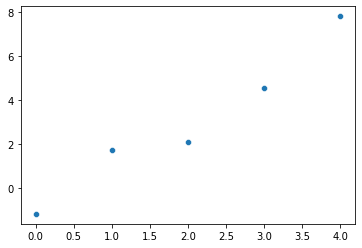

In [3]:
sns.scatterplot(x=X,y=y)

$$ b = (X'X)^{-1}X'Y $$

In [4]:
X1 = sm.add_constant(X)
b = inv(X1.T @ X1)@X1.T@y
b

array([-1.164,  2.079])

$$ \hat{Y_i} = \beta_0 + \beta_1 X_i $$

In [5]:
y_hat = b[0] +b[1]*X

<AxesSubplot:>

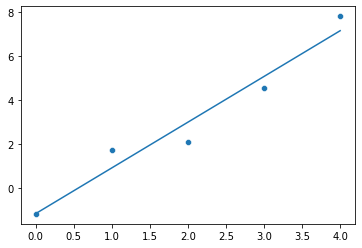

In [6]:
sns.scatterplot(x=X,y=y)
sns.lineplot(x=X, y=y_hat)

$$ e_{n x 1} = Y_{n x 1} - \hat{Y}_{n x 1} $$

In [7]:
e = y-y_hat

$$SSE = e'e$$

In [8]:
SSE = e.T@e
SSE

2.2353099999999992

$$ SSR = b'X'Y - \frac{1}{n}Y'JY $$

In [9]:
J = np.ones((y.shape[0],y.shape[0]))
SSR = b.T@X1.T@y -(1/y.shape[0])*y.T@J@y
SSR

43.222409999999996

$$ SSTO = Y'Y- \left(\frac{1}{n}\right)Y'JY $$

In [10]:
SSTO = y.T@y- 1/y.shape[0]*y.T@J@y
SSTO

45.457719999999995

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = sm.OLS(y, X1).fit()

In [12]:
df = pd.DataFrame(y.T,X.T, columns = ['y']).reset_index()
df.rename(columns = {"index":"X", "y":'y'})
lm=ols('y~X', data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

           df    sum_sq    mean_sq          F    PR(>F)
X         1.0  43.22241  43.222410  58.008612  0.004698
Residual  3.0   2.23531   0.745103        NaN       NaN


In [13]:
y_mean = np.mean(y)
y_mean

2.9939999999999998

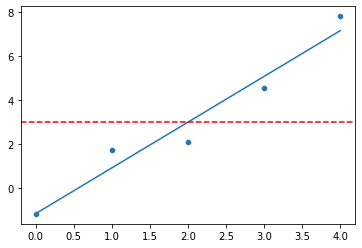

In [14]:
sns.scatterplot(x=X,y=y)
sns.lineplot(x=X, y=y_hat)
plt.axhline(y = y_mean, color = 'red',ls ='--')

In [15]:
avgline_y = y_mean*np.ones(len(X))
avgline_y

array([2.994, 2.994, 2.994, 2.994, 2.994])

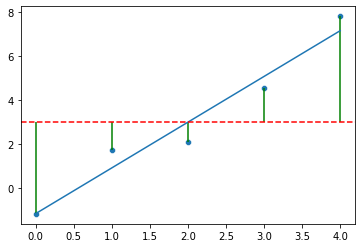

In [16]:
lines = []
for i in range(len(X)):
    pair=[(X[i],y[i]), (X[i], avgline_y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors = 'green')
fig, ax = plt.subplots()
ax.add_collection(linecoll)
sns.scatterplot(x=X,y=y)
sns.lineplot(x=X, y=y_hat)
plt.axhline(y = y_mean, color = 'red',ls ='--')

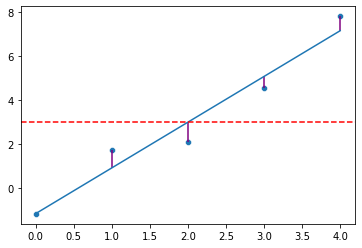

In [17]:
lines = []
for i in range(len(X)):
    pair=[(X[i],y[i]), (X[i], y_hat[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, color = 'purple')
fig, ax = plt.subplots()
ax.add_collection(linecoll)
sns.scatterplot(x=X,y=y)
sns.lineplot(x=X, y=y_hat)
plt.axhline(y = y_mean, color = 'red',ls ='--')